In [2]:
import sys
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
from scipy import signal
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import scipy.optimize
import functools

#from utils import *
#from utils_refine import *
from utils_bb import *

from pathlib import Path
from delete_mod import *
from shapely.geometry import Polygon

In [12]:
import numpy as np
from shapely.geometry import Polygon

In [21]:
from utils_bb import *
import pickle

In [28]:
index_file = 'keys/objs/index4.npy'
def draw_boundbox_v2(index_fil = index_file):
    t = 0
    res = np.zeros((1,6))
    index = np.load(index_fil)
    for idx in index:
        top = idx['top_coord']
        z_max = idx["tall"][0]
        z_min = idx["tall"][1]
        label = idx["label"]
        off_set = idx["offset"]
        if label.split("_")[0] == 'floor':
            continue
        res1 = draw_polygen(top,z_max,z_min,off_set,idx["label"])
        t = t + 1
        res = np.concatenate((res,res1), axis=0)
    write_ply('keys/res/bb_'+ str(t) +'.ply', res[1:,:])
    return 0

In [25]:
index = np.load(index_file)
label = index[0]["label"]

In [31]:
draw_boundbox_v2('keys/objs/index4.npy')

0

In [29]:
idx = np.load('keys/objs/index.npy')
idx

[{'label': '83_88_92',
  'offset': array([0., 0.]),
  'tall': array([-0.12123154, -0.63112018]),
  'top_coord': [(-0.5032983684539795, 1.317673683166504),
   (-0.24000984132289888, 1.317673683166504),
   (-0.24000984132289888, 1.7255748510360718),
   (-0.5032983684539795, 1.7255748510360718)]},
 {'label': '71_70_73',
  'offset': array([0., 0.]),
  'tall': array([-0.5286326 , -0.55531677]),
  'top_coord': [(-0.2665367877483368, 1.3309184312820435),
   (-0.20659451842308044, 1.3309184312820435),
   (-0.20659451842308044, 1.4519572257995605),
   (-0.2665367877483368, 1.4519572257995605)]},
 {'label': '100_101_106',
  'offset': array([0., 0.]),
  'tall': array([-0.08608715, -0.74028997]),
  'top_coord': [(-0.259566593170166, 0.9261503219604492),
   (0.7575704896450042, 0.9261503219604492),
   (0.7575704896450042, 1.8741518259048462),
   (-0.259566593170166, 1.8741518259048462)]},
 {'label': '3_8_8',
  'offset': array([0., 0.]),
  'tall': array([-0.42651281, -0.48665742]),
  'top_coord': [(

In [9]:
idx[1][0]['tall']

array([-0.32853417, -0.5982657 ])

In [82]:
import cv2
import skimage
import scipy
from skimage import data, segmentation, color
from skimage.future import graph
from matplotlib import pyplot as plt
from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

In [2]:
from skimage import data, io, segmentation, color
from skimage.future import graph
import numpy as np


def _weight_mean_color(graph, src, dst, n):
    """Callback to handle merging nodes by recomputing mean color.

    The method expects that the mean color of `dst` is already computed.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    n : int
        A neighbor of `src` or `dst` or both.

    Returns
    -------
    data : dict
        A dictionary with the `"weight"` attribute set as the absolute
        difference of the mean color between node `dst` and `n`.
    """

    diff = graph.node[dst]['mean color'] - graph.node[n]['mean color']
    diff = np.linalg.norm(diff)
    return {'weight': diff}


def merge_mean_color(graph, src, dst):
    """Callback called before merging two nodes of a mean color distance graph.

    This method computes the mean color of `dst`.

    Parameters
    ----------
    graph : RAG
        The graph under consideration.
    src, dst : int
        The vertices in `graph` to be merged.
    """
    graph.node[dst]['total color'] += graph.node[src]['total color']
    graph.node[dst]['pixel count'] += graph.node[src]['pixel count']
    graph.node[dst]['mean color'] = (graph.node[dst]['total color'] /
                                     graph.node[dst]['pixel count'])

def remake_image(image):
    temp = np.zeros(image.shape)
    temp[:,:,0] = abs(image[:,:,0] - image[:,:,1])
    temp[:,:,1] = abs(image[:,:,1] - image[:,:,2])
    temp[:,:,2] = abs(image[:,:,2] - image[:,:,0])
    return temp

In [26]:
skimage.morphology.square(3)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

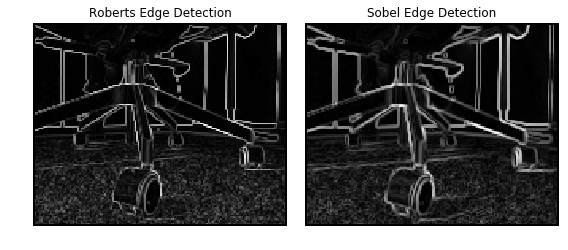

In [51]:
#image = camera()
image = skimage.io.imread('images/0/0.jpg')
image = skimage.morphology.closing(image[:,:,0],skimage.morphology.square(5))
image = skimage.transform.resize(image, (128,160),mode = 'reflect')
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

E:\program\Anaconda3\envs\tensorflow_gpu\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
E:\program\Anaconda3\envs\tensorflow_gpu\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


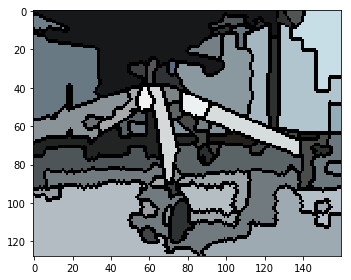

In [101]:
image = cv2.imread('images/0/0.jpg')
image = cv2.resize(image, (160*1, 128*1))

#img = remake_image(image)
img = image

labels = segmentation.slic(img, compactness=30, n_segments=400)
g = graph.rag_mean_color(image, labels)

labels2 = graph.merge_hierarchical(labels, g, thresh=35, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_mean_color,
                                   weight_func=_weight_mean_color)

out = color.label2rgb(labels2, image, kind='avg')
out = segmentation.mark_boundaries(out, labels2, (0, 0, 0))
io.imshow(out)
io.show()

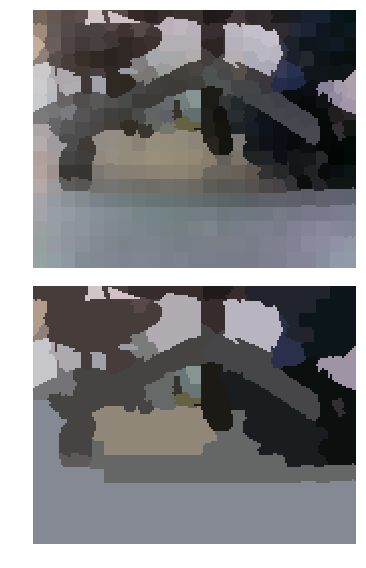

In [170]:
#image = skimage.io.imread('keys/segs/1ii.jpg')
#image = skimage.transform.resize(image, (400,600,3), mode = 'reflect')
#image = data.coffee()

image = cv2.imread('keys/segs/6ii.jpg')
image = cv2.resize(image, (160, 128))
#image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#equ = cv2.equalizeHist(image)
#image = np.hstack((image, equ))


labels1 = segmentation.slic(image, compactness=30, n_segments=400)
out1 = skimage.color.label2rgb(labels1, image, kind='avg')

g = graph.rag_mean_color(image, labels1, mode='similarity')
labels2 = graph.cut_normalized(labels1, g,thresh=0.05, num_cuts=10)
out2 = skimage.color.label2rgb(labels2, image, kind='avg')

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(6, 8))

ax[0].imshow(out1)
ax[1].imshow(out2)

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

In [3]:
import numpy as np

In [6]:
tall1 = np.array([1,2])
a1,b1 = min(tall1), max(tall1)
b1

2

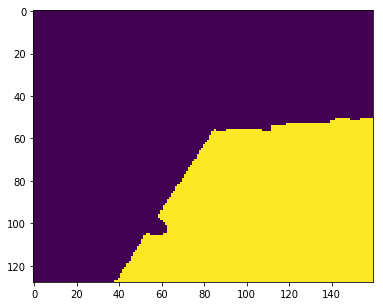

In [148]:
idx = proportion_floor(labels2)
mask1 = np.ma.masked_equal(labels2, idx)
plt.imshow(mask1.mask)

In [175]:
seg_save = 'keys/bbmask/t'
mask_from_labels(labels2, seg_save)

0

## Optical Flow

In [94]:
feature_params = dict( maxCorners = 1000,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Create some random colors
color = np.random.randint(0,255,(100,3))
# Take first frame and find corners in it
old_frame = cv2.imread('keys/segs/64ii.jpg')
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)

In [173]:
sift = cv2.xfeatures2d.SIFT_create(50)
old_frame = cv2.imread('keys/segs/76ii.jpg')
#old_frame = scipy.ndimage.filters.gaussian_filter(old_frame, 20, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
old_gray = skimage.morphology.closing(old_gray,skimage.morphology.square(5))
kp1, des1 = sift.detectAndCompute(old_gray,None)
p0 = []
for i in range(len(kp1)):
    p0.append(kp1[i].pt)
p0 = np.reshape(np.ravel(p0),(-1,1,2))
p0 = p0.astype(np.float32)
mask = np.zeros_like(old_frame)

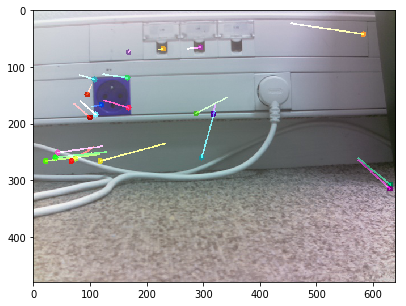

In [174]:
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
frame = cv2.imread('keys/segs/77ii.jpg')
#frame = scipy.ndimage.filters.gaussian_filter(frame, 20, order=0, output=None, mode='reflect', cval=0.0, truncate=4.0)
frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
frame_gray = skimage.morphology.closing(frame_gray,skimage.morphology.square(5))
# calculate optical flow
p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
# Select good points
good_new = p1[st==1]
good_old = p0[st==1]
# draw the tracks
for i,(new,old) in enumerate(zip(good_new,good_old)):
    a,b = new.ravel()
    c,d = old.ravel()
    mask = cv2.line(mask, (a,b),(c,d), color[i].tolist(), 2)
    frame = cv2.circle(frame,(a,b),5,color[i].tolist(),-1)
img = cv2.add(frame,mask)
plt.imshow(img)

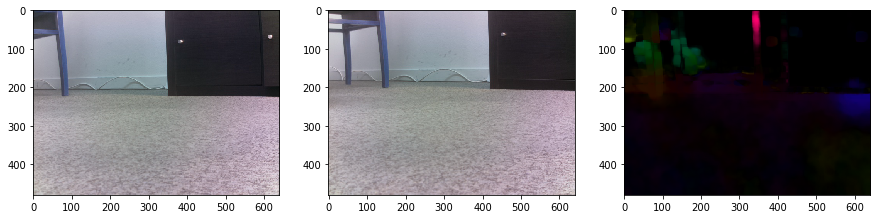

In [35]:
frame1 = cv2.imread('keys/segs/64ii.jpg')
prvs = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

frame2 = cv2.imread('keys/segs/65ii.jpg')
nextf = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)
flow = cv2.calcOpticalFlowFarneback(prvs,nextf, None, 0.5, 3, 15, 3, 5, 1.2, 0)
mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
hsv[...,0] = ang*180/np.pi/2
hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
bgr = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)
plt.subplot(131); plt.imshow(frame1)
plt.subplot(132); plt.imshow(frame2)
plt.subplot(133); plt.imshow(bgr)

# Test of camera calibration and estimation of pose

In [ ]:
mtx, dist,imgpoints = get_camera_matrix('F:/pfe/segmentation/TFSegmentation/cv/cal2/*.jpg')

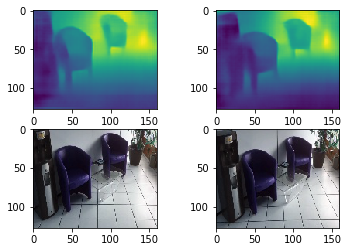

In [2]:
file1 = 'keys/4.JPG'
file2 = 'keys/3.JPG'
im2 = cv2.imread(file2)
im1 = cv2.imread(file1)
im1 = cv2.resize(im1, (newWidth*1, newHeight*1))
im2 = cv2.resize(im2, (newWidth*1, newHeight*1))  
dep1 = "keys/deps/4.npy" 
dep2 = "keys/deps/3.npy" 
d1 = np.load(dep1)
d2 = np.load(dep2)
plt.subplot(221); plt.imshow(d1.reshape(128,160))
plt.subplot(222); plt.imshow(d2.reshape(128,160))
plt.subplot(223); plt.imshow(im1)
plt.subplot(224); plt.imshow(im2)

In [ ]:
pts1, pts2, kp1, kp2, matches, matchesMask = sift_points(im1,im2, 0.55)
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(im1,kp1,im2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()

In [ ]:
mtx = np.zeros((3,3))
mtx[0,0]=200
mtx[1,1]=200
mtx[2,2]=1
mtx

In [ ]:
t1,t2,R1,R2,E = getP_from2d(pts1,pts2,mtx)
M1 = get_right_P(t1,t2,R1,R2, pts1,d1, pts2,d2, mtx)
M1

In [ ]:
M = np.zeros((3,4))
R = -R2
M[0:3,0:3] = R.T
M[0:3,3] = -np.dot(R.T,-t2)
#M[0:3,3] = t2
M

In [ ]:
pts11 = verttt(pts1,d1[0,:,:,0] ,1)
pts21 = verttt(pts2,d2[0,:,:,0] ,1)
retval, M, inliers = cv2.estimateAffine3D(pts21, pts11, ransacThreshold=3)
M

In [ ]:
res1 = vert_new(im1, d1[0,:,:,0], np.eye(3,4), mtx, False,True)
res2 = vert_new(im2, d2[0,:,:,0], M,mtx,False,True)
res = np.concatenate((res1,res2), axis=0)
write_ply('out1.ply', res1)
write_ply('out2.ply', res2)

In [ ]:
res1 = vert(im1, d1[0,:,:,0], np.eye(3,4), False,False)
res2 = vert(im2, d2[0,:,:,0], M,False, False)
res = np.concatenate((res1,res2), axis=0)
write_ply('out3.ply', res)

In [30]:
delete_module('utils')
from utils import *
delete_module('utils_bb')
from utils_bb import *
delete_module('utils_refine')
from utils_refine import *

# Test of tensoeflow

In [13]:
import os
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from PIL import Image
import cv2
import models

In [8]:
model_data_path = 'F:/pfe/cnn_slam/FCRN-DepthPrediction-master/ckpt/NYU_FCRN.ckpt'

def result_resnet( image):
    # Default input size
    height = 228
    width = 304
    channels = 3
    batch_size = 1

    # Read image
    img = image
    img = cv2.resize(img, (width,height))
    img = np.array(img).astype('float32')
    img = np.expand_dims(np.asarray(img), axis = 0)

    # Create a placeholder for the input image
    input_node = tf.placeholder(tf.float32, shape=(None, height, width, channels))
    # Construct the network
    net = models.ResNet50UpProj({'data': input_node}, batch_size, 1, False)

    with tf.Session() as sess:

        # Load the converted parameters
        print('Loading the model')

        # Use to load from ckpt file
        saver = tf.train.Saver()
        saver.restore(sess, model_data_path)

        # Use to load from npy file
        #net.load(model_data_path, sess)

        # Evalute the network for the given image
        # pred = sess.run(net.get_output(), feed_dict={input_node: img})
        res_result = sess.run(net.get_layer_output('res5c_relu'), feed_dict={input_node: img})
        
        return res_result


In [ ]:
from tensorflow.contrib import learn
from tensorflow.contrib.learn.python.learn.estimators import model_fn as model_fn_lib


In [ ]:
def main():
  # Load training and eval data
    fo = open('F:/pre/cifar10/train_data','rb')
    train_data = pickle.load(fo)
    fo.close()
    fo = open('F:/pre/cifar10/train_labels','rb')
    train_labels = pickle.load(fo)
    fo.close()
 
    fo = open('F:/pre/cifar10/eval_data','rb')
    eval_data = pickle.load(fo)
    fo.close()

    fo = open('F:/pre/cifar10/eval_labels','rb')
    eval_labels = pickle.load(fo)
    fo.close()

    # Create the Estimator
    cifar_classifier = learn.SKCompat(learn.Estimator(
      model_fn=cnn.cnn_model_fn, model_dir="F:/pre/cifar10/cifar_model"))
    # Set up logging for predictions
    # Log the values in the "Softmax" tensor with label "probabilities"
    tensors_to_log = {"probabilities": "softmax_tensor"}
    logging_hook = tf.train.LoggingTensorHook(
      tensors=tensors_to_log, every_n_iter=50)

    # Train the model
    cifar_classifier.fit(
      x=train_data,
      y=train_labels,
      batch_size=100,
      steps=100,
      monitors=[logging_hook])

    # Configure the accuracy metric for evaluation
    metrics = {
      "accuracy":
          learn.MetricSpec(
              metric_fn=tf.metrics.accuracy, prediction_key="classes"),
    }

    # Evaluate the model and print results
    prediction = cifar_classifier.predict(eval_data)
  
    with tf.Session() as sess:
        saver = tf.train.Saver(tf.global_variables())
        saver.save(sess, 'apple')

  
    correct = 0
    for i in range(len(eval_labels)):
        if prediction["classes"][i] == eval_labels[i]:
            correct = correct + 1
            p = correct / len(eval_labels)
    print("the correct rate is %d"%p)
    print("total number of evaluation is %d"%len(eval_labels))

    print("done")


In [9]:

image = 'F:\pfe\segmentation\images\IMG_8381.JPG'
img = cv2.imread(image)
res_result = result_resnet( img)

Loading the model
INFO:tensorflow:Restoring parameters from F:/pfe/cnn_slam/FCRN-DepthPrediction-master/ckpt/NYU_FCRN.ckpt


In [12]:
np.shape(res_result)

(1, 8, 10, 2048)

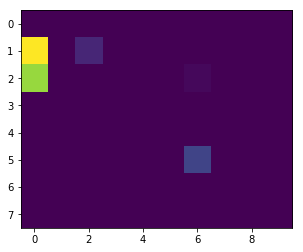

In [16]:
plt.imshow(res_result[0,:,:,1])